# Convolutional Neural Network Architecture

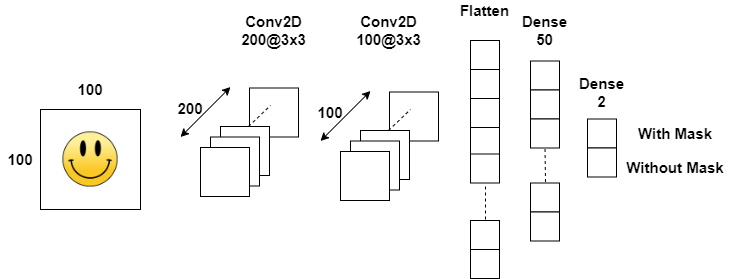

In [8]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [11]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=35,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/35
31/31 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.4737INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


31/31 [==============================] - 34s 1s/step - loss: 0.6939 - accuracy: 0.4737 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 2/35
31/31 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5020INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


31/31 [==============================] - 27s 855ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 3/35
31/31 [==============================] - 15s 492ms/step - loss: 0.6933 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 4/35
31/31 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5020INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


31/31 [==============================] - 16s 529ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 5/35
31/31 [==============================] - 15s 482ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 6/35
31/31 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4859INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


31/31 [==============================] - 16s 521ms/step - loss: 0.6932 - accuracy: 0.4859 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 7/35
31/31 [==============================] - 15s 471ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 8/35
31/31 [==============================] - 14s 468ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 9/35
31/31 [==============================] - 14s 468ms/step - loss: 0.6933 - accuracy: 0.4657 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 10/35
31/31 [==============================] - 15s 475ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 11/35
31/31 [==============================] - 15s 500ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 12/35
31/31 [==============================] - 15s 496ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 1

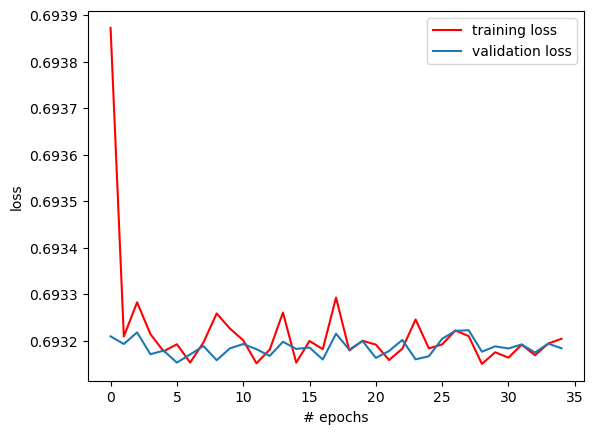

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

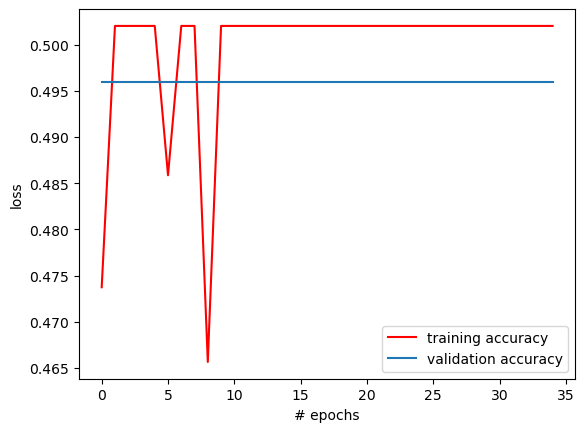

In [13]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 119ms/step - loss: 0.6931 - accuracy: 0.5072
[0.6931006908416748, 0.5072463750839233]
